## Introduction

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats as st

In [2]:
#Read in data
try:
    df = pd.read_csv('/datasets/games.csv')

except FileNotFoundError:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


[0] Name, [2] Year_of_Release, [3] Genres, [8] Critic_Score, [9] User_Score, [10] Rating all have missing values  

## Step 2 Prepare the Data

In [4]:
#Replace the column names (make them lowercase).
df.columns = df.columns.str.lower()
#Verify
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()/len(df)

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [6]:
mis_values = df.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(df.isnull().sum()/len(df),3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
critic_score,8578,0.513
rating,6766,0.405
user_score,6701,0.401
year_of_release,269,0.016
name,2,0.000
platform,0,0.000
genre,2,0.000
na_sales,0,0.000
eu_sales,0,0.000
jp_sales,0,0.000


In [7]:
#Convert the data to the required types.

#Presence of missing values, need to fill them in or remove. As of now, I've decided to fill them in since we may not be concerned with dates. 
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
#Change float to int, since decimal value is unnecessary 
df['year_of_release'] = df['year_of_release'].astype(int)

In [8]:
#Rows where genre are missing also have many other columns that are missing. Because we are concerned with genre, I have decided to remove them. 
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
#Remove both rows with missing genre values
df = df[df['genre'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Critic Score, User Score, and Rating are only columns with missing info

In [10]:
#Could use the mean critic_score to replace missing values based on platform 
platform_means = df.groupby('platform')['critic_score'].mean().reset_index()
platform_means

,platform,critic_score
0,2600,NaN
1,3DO,NaN
2,3DS,67.101190
3,DC,87.357143
4,DS,63.761506
5,GB,NaN
6,GBA,67.372146
7,GC,69.488839
8,GEN,NaN
9,GG,NaN


Platforms with NaN values all have no Critic Score. At the moment, I am deciding to leave the last 3 columns with their respective NaN
values since we are more concerned with sales. 

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
#Pay attention to the abbreviation TBD (to be determined). Replace with nan
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [12]:
user_mean = df['user_score'].mean()
df['user_score'] = df['user_score'].fillna(user_mean)

In [13]:
tbd_rows = df[df['user_score'] == 'tbd']
tbd_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [14]:
#Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.
df.loc[:, 'total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

## Step 3 Analyze the Data

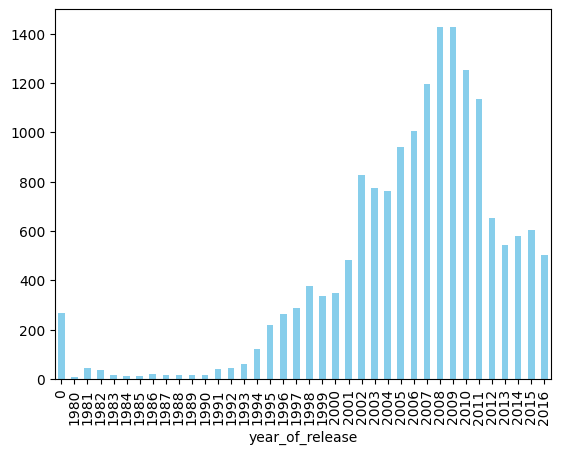

In [15]:
#Look at how many games were released in different years. Is the data for every period significant?
yearly_counts = df.groupby('year_of_release').size()
yearly_counts.plot(kind='bar', color='skyblue')
plt.show()

From 1994 until 2008, release of games were increasing. After 2009, release of games have seen a downard trend. 

(Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?)

In [16]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [17]:
sales_by_plat = df.groupby('platform').agg({'total_sales': ['mean','min','max']})

In [18]:
sales_by_plat

total_sales             
                mean   min    max
platform                         
2600        0.729173  0.07   7.81
3DO         0.033333  0.02   0.06
3DS         0.498077  0.01  14.60
DC          0.306731  0.02   2.41
DS          0.374765  0.01  29.80
GB          2.606735  0.06  31.38
GBA         0.386679  0.01  15.84
GC          0.357788  0.01   7.06
GEN         1.050000  0.03   6.02
GG          0.040000  0.04   0.04
N64         0.685517  0.01  11.90
NES         2.561735  0.06  40.24
NG          0.120000  0.02   0.25
PC          0.266448  0.01   8.01
PCFX        0.030000  0.03   0.03
PS          0.610576  0.01  10.95
PS2         0.581106  0.00  20.81
PS3         0.705973  0.00  21.05
PS4         0.801378  0.01  14.63
PSP         0.243218  0.01   7.68
PSV         0.125744  0.01   1.96
SAT         0.194162  0.02   1.93
SCD         0.310000  0.04   1.50
SNES        0.836987  0.01  20.62
TG16        0.080000  0.02   0.14
WS          0.236667  0.03   0.51
Wii         0.687508  0.01  82.54
WiiU        0.559116  0.01   7.09
X360        0.769746  0.01  21.82
XB          0.312791  0.01   8.48
XOne        0.645020  0.01   7.39

PS2 and PS3 are platforms that now have zero sales 

In [19]:
ps2 = df[df['platform'] == 'PS2']

In [20]:
ps2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.000000,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.700000,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.400000,E,14.97
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.500000,M,13.10
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.500000,E,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,7.125046,NaN,0.01
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,7.125046,NaN,0.01
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,7.125046,NaN,0.01
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,7.125046,NaN,0.01


In [21]:
total_sales_by_year = ps2.groupby('year_of_release')['total_sales'].sum()

<AxesSubplot:title={'center':'Total Sales by Year'}, xlabel='Release Year', ylabel='Total Sales'>

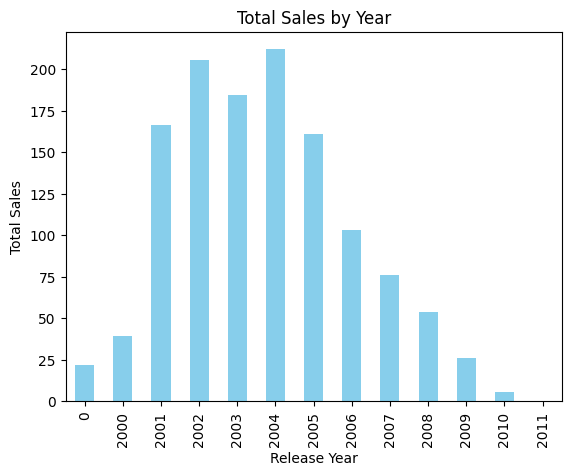

In [22]:
total_sales_by_year.plot(kind='bar', color='skyblue', title='Total Sales by Year', xlabel='Release Year', ylabel='Total Sales')

In [23]:
#Not concerned with years where year_of_release was filled with zero
filter = df[df['year_of_release'] != 0]
platform_lifespan = filter.groupby('platform')['year_of_release'].agg(['min', 'max'])
#Find lifespand for PS2 and PS3 platforms
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

In [24]:
platform_lifespan

,min,max,lifespan
platform,,,
2600,1980,1989,9
3DO,1994,1995,1
3DS,2011,2016,5
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2001,13
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4


In [25]:
platform_lifespan['lifespan'].mean()

7.612903225806452

Conclusion: 

PS2 and PS3 sales eventually reached zero when they both used to be in the top 3 consoles. Their average lifespan
is 10.5 years. Meanwhile, all data for platforms average 7.6 years in rise and fall. 

## Data from 2012 and after

In [26]:
#shortr time period
filtered_df = df[df['year_of_release'] >= 2013]

In [27]:
filtered_df.shape

(2233, 12)

Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [28]:
sum_sales = filtered_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [29]:
sum_sales

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

In [30]:
#DataFrame where the rows represent the years, 
#the columns represent the platforms, and the values 
#represent the total sales for each platform in each year. 
df = filtered_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().sort_values().unstack()#.index.get_level_values('platform').unique()

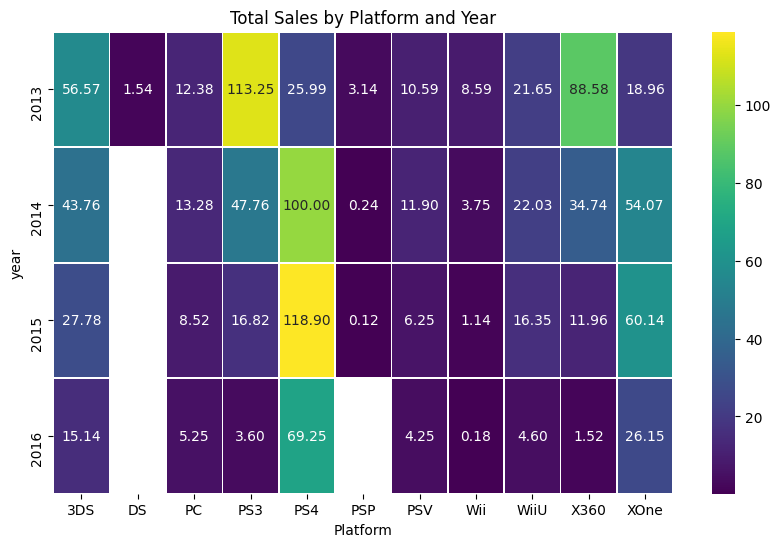

In [31]:
# Set 'year_of_release' as the index
df.set_index(df.index, inplace=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Total Sales by Platform and Year')
plt.xlabel('Platform')
plt.ylabel('year')
plt.show()

According to the heatmap, the PS4 and Xone will be our top platforms in 2017. Sales peaked for the PS4 in 2015, and from the data in 2016, we are beginning to see a decline in total sales. From the data, we can expect PS4 and Xone sales to outperform other platforms.

Question:

Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [32]:
filtered_df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.100000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,7.125046,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,7.125046,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.300000,M,12.62


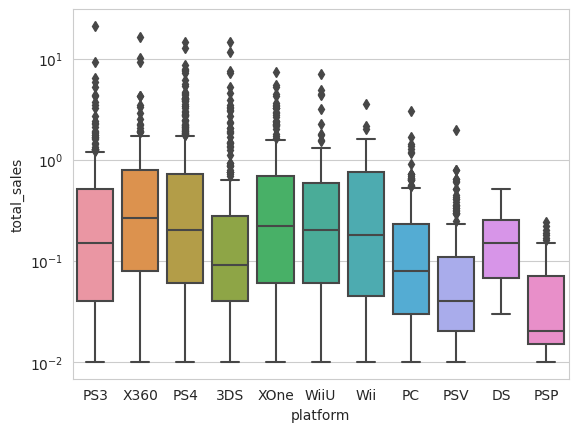

In [33]:
sns.set_style('whitegrid')
sns.boxplot(x=filtered_df['platform'], y=filtered_df['total_sales'])
plt.yscale('log')

In [34]:
filtered_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
PSP     0.052239
Name: total_sales, dtype: float64

The difference in sales among handheld portable gaming systems counterparts is significant,
I am not surprised to see the x360 had the highest average sales because of the time frame in which this system was relevant. Total sales 
peaked within its lifetime, as depicted in the figure above.

Question:

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

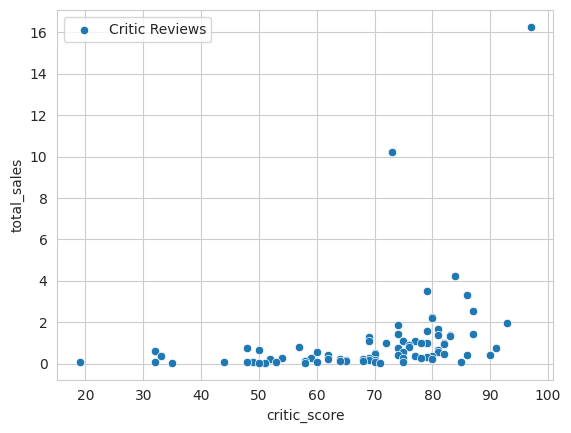

In [35]:
sns.scatterplot(x='critic_score', y='total_sales', data=filtered_df[filtered_df['platform'] == 'X360'], label='Critic Reviews')

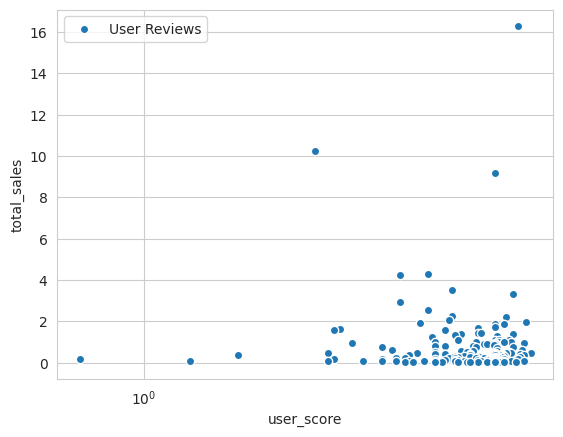

In [36]:
my_plot = sns.scatterplot(x='user_score', y='total_sales', data=filtered_df[filtered_df['platform'] == 'X360'], label='User Reviews', linewidth=1)
plt.xscale('log')

Critic Score has more of an impact on sales compared to user score. As shown in the image above, there are many games
with high user scores, but they only have small amounts of sales.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Well done! Very nice scatter plots.


In [37]:
filtered_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.100000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,7.125046,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,7.125046,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.300000,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,7.125046,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.600000,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.600000,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,7.125046,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.300000,E,8.58


In [38]:
gta_v_sales = filtered_df[filtered_df['name'] == 'Grand Theft Auto V'][['name', 'platform', 'total_sales','critic_score']]
gta_v_sales

,name,platform,total_sales,critic_score
16,Grand Theft Auto V,PS3,21.05,97.0
23,Grand Theft Auto V,X360,16.27,97.0
42,Grand Theft Auto V,PS4,12.62,97.0
165,Grand Theft Auto V,XOne,5.47,97.0
1730,Grand Theft Auto V,PC,1.17,96.0


In [39]:
cod = filtered_df[filtered_df['name'].str.contains('Call of Duty')][['name', 'platform', 'total_sales', 'critic_score']]

In [40]:
cod = cod.sort_values(by='critic_score', ascending=False)

In [41]:
cod

,name,platform,total_sales,critic_score
92,Call of Duty: Advanced Warfare,PS4,7.66,83.0
179,Call of Duty: Advanced Warfare,XOne,5.26,81.0
323,Call of Duty: Ghosts,PS4,3.83,78.0
493,Call of Duty: Ghosts,XOne,2.92,78.0
640,Call of Duty: Infinite Warfare,XOne,2.42,78.0
4736,Call of Duty: Advanced Warfare,PC,0.41,78.0
245,Call of Duty: Infinite Warfare,PS4,4.47,77.0
60,Call of Duty: Ghosts,X360,10.24,73.0
9292,Call of Duty: Infinite Warfare,PC,0.13,73.0
69,Call of Duty: Ghosts,PS3,9.36,71.0


For data on total sales with an applicable critic score, the higher the critic score, the more sales there are in games. 

Question:

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

<AxesSubplot:xlabel='genre'>

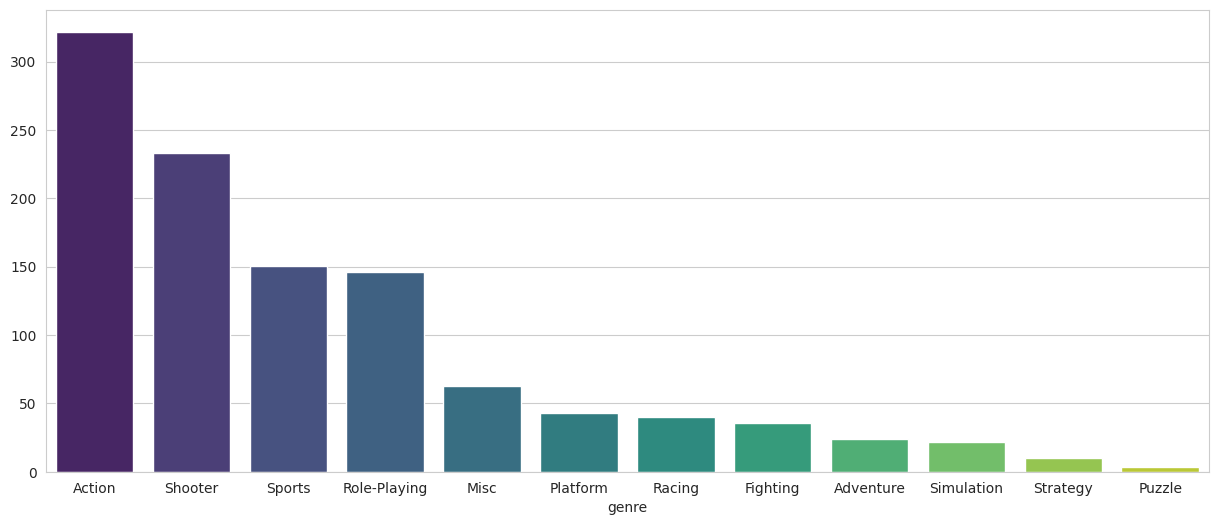

In [42]:
genre_sales = filtered_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualize the distribution of games by genre
plt.figure(figsize=(15, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')

Most popular genre by far is action, followed by shooter and role-playing games. The least popular genre is puzzle. 

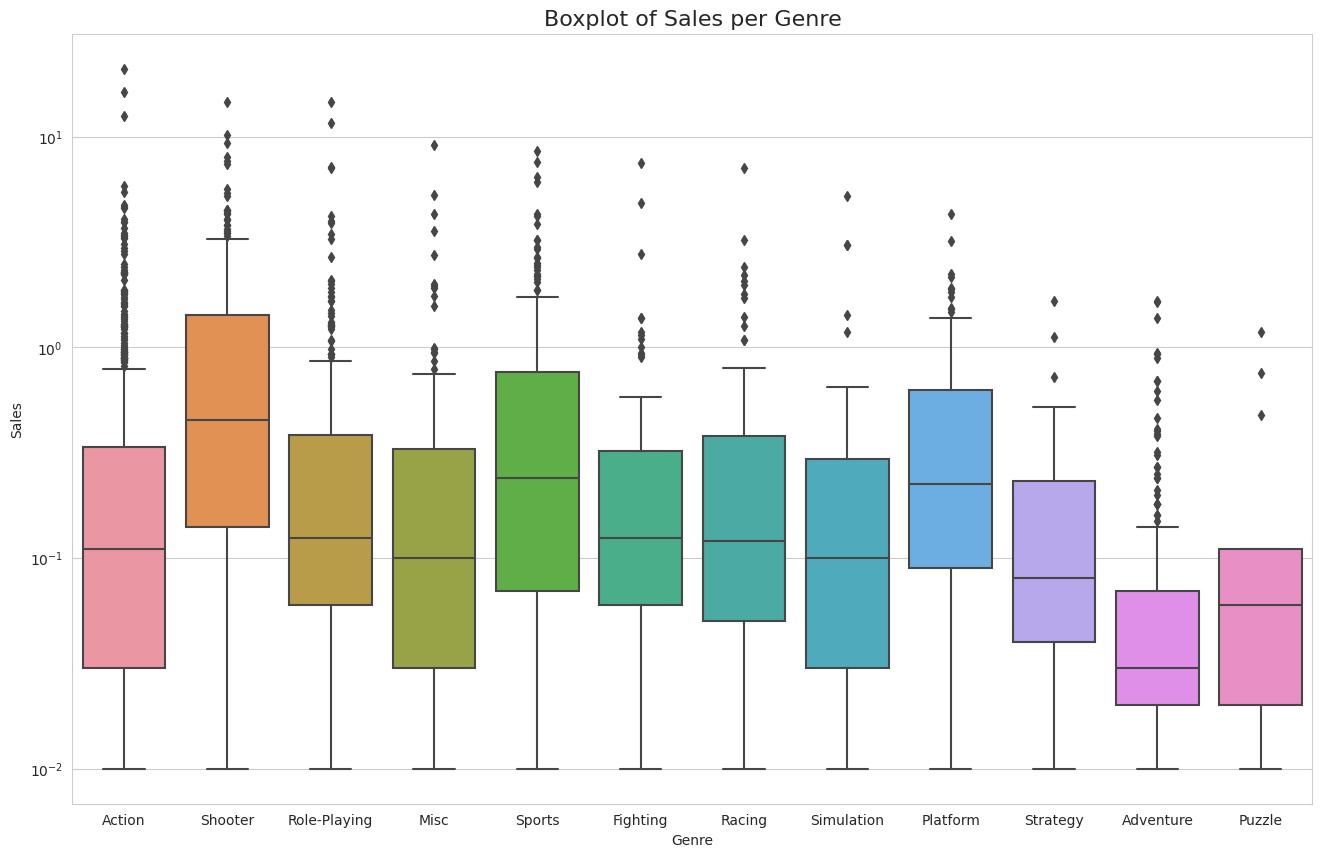

In [43]:
#Grab genre and total sales
filtered_df.columns
plt.figure(figsize=(16, 10))
sns.boxplot(x='genre', y='total_sales', data= filtered_df)
plt.title('Boxplot of Sales per Genre', fontsize=16)
plt.xlabel('Genre')
plt.ylabel('Sales')
#Adjust scale size
plt.yscale('log')
plt.show()

## Step 4. Create a user profile for each region

For each region (NA, EU, JP), determine:

The top five platforms. 
Describe variations in their market shares from region to region.

The top five genres.
 Explain the difference.

Do ESRB ratings affect sales in individual regions?


In [44]:
#Function 

def sales(df, filtered_df, region):
    
    filtered_df['rating'] = filtered_df['rating'].fillna('Unknown')
    
    genres = []
    na_sales_percent = []
    eu_sales_percent = []
    jp_sales_percent = []
    
    for i in range(5):
        genre = df.index[i]
        genres.append(genre)
        
        na_sales_percentage = df.iloc[i, 0] / df.iloc[i, 3]
        eu_sales_percentage = df.iloc[i, 2] / df.iloc[i, 3]
        jp_sales_percentage = df.iloc[i, 1] / df.iloc[i, 3]
        
        na_sales_percent.append(na_sales_percentage)
        eu_sales_percent.append(eu_sales_percentage)
        jp_sales_percent.append(jp_sales_percentage)
        
    percentages_df = pd.DataFrame({
        'Genre': genres,
        'NA Sales Percentage': na_sales_percent,
        'EU Sales Percentage': eu_sales_percent,
        'JP Sales Percentage': jp_sales_percent
    })
    
    # Plotting the sales percentages
    percentages_df.set_index('Genre').plot(kind='bar', figsize=(12, 8))
    plt.title('Sales Percentages by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Sales Percentage')
    plt.xticks(rotation=45)
    plt.show()
        
    genre_sales = filtered_df.groupby('genre')[region].sum().sort_values(ascending=False)
    rating_sales = filtered_df.groupby('rating')[region].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='Set2')
    plt.title(f'Total {region} Sales by Genre')
    plt.xlabel('Genre')
    plt.ylabel(f'{region} Sales')
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=rating_sales.index, y=rating_sales.values, palette='Set2')
    plt.title(f'Total {region} Sales by Rating')
    plt.xlabel('Rating')
    plt.ylabel(f'{region} Sales')
    plt.xticks(rotation=45)
    plt.show()
    

        

In [45]:
filtered_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.200000,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.100000,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,7.125046,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,7.125046,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.300000,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,7.125046,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.600000,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.600000,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,7.125046,NaN,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.300000,E,8.58


In [46]:
filtered_df['rating'].unique

<bound method Series.unique of 16         M
23         M
31       NaN
33       NaN
42         M
        ... 
16703    NaN
16707    NaN
16710    NaN
16712    NaN
16714    NaN
Name: rating, Length: 2233, dtype: object>

## NA Top Platforms

In [47]:
na = filtered_df.groupby('platform')[['na_sales', 'jp_sales', 'eu_sales', 'total_sales']].sum().sort_values(by='na_sales', ascending=False)

In [48]:
na

,na_sales,jp_sales,eu_sales,total_sales
platform,,,,
PS4,108.74,15.96,141.09,314.14
XOne,93.12,0.34,51.59,159.32
X360,81.66,0.51,42.52,136.80
PS3,63.50,23.35,67.81,181.43
3DS,38.20,67.81,30.96,143.25
WiiU,29.21,10.88,19.85,64.63
PC,11.11,0.00,25.36,39.43
Wii,6.56,0.05,5.93,13.66
PSV,5.04,18.59,6.10,32.99


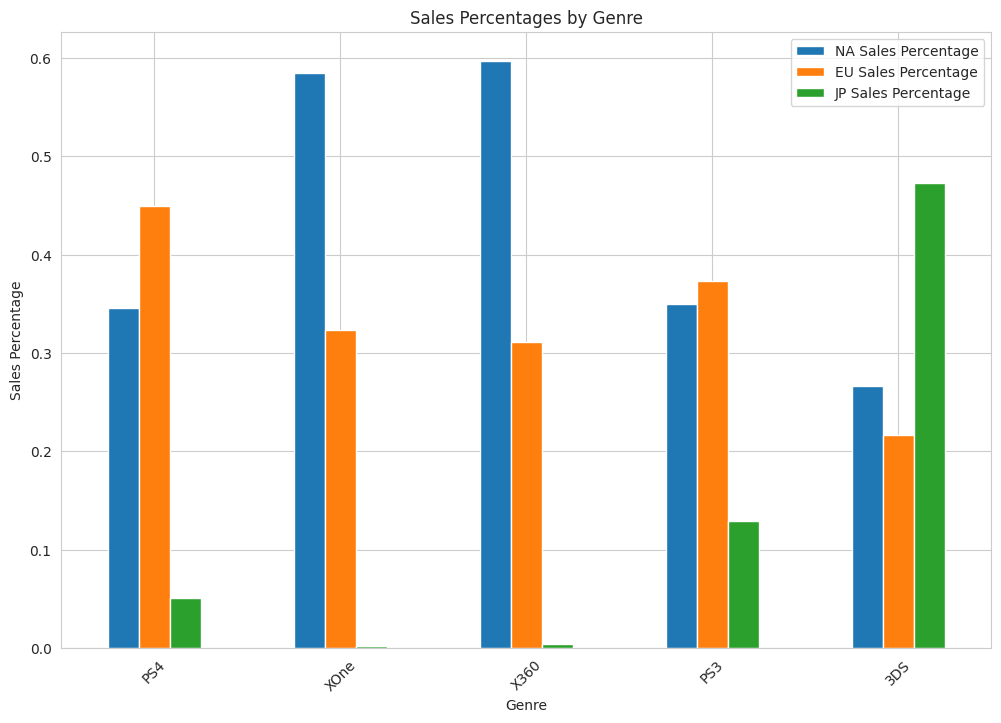

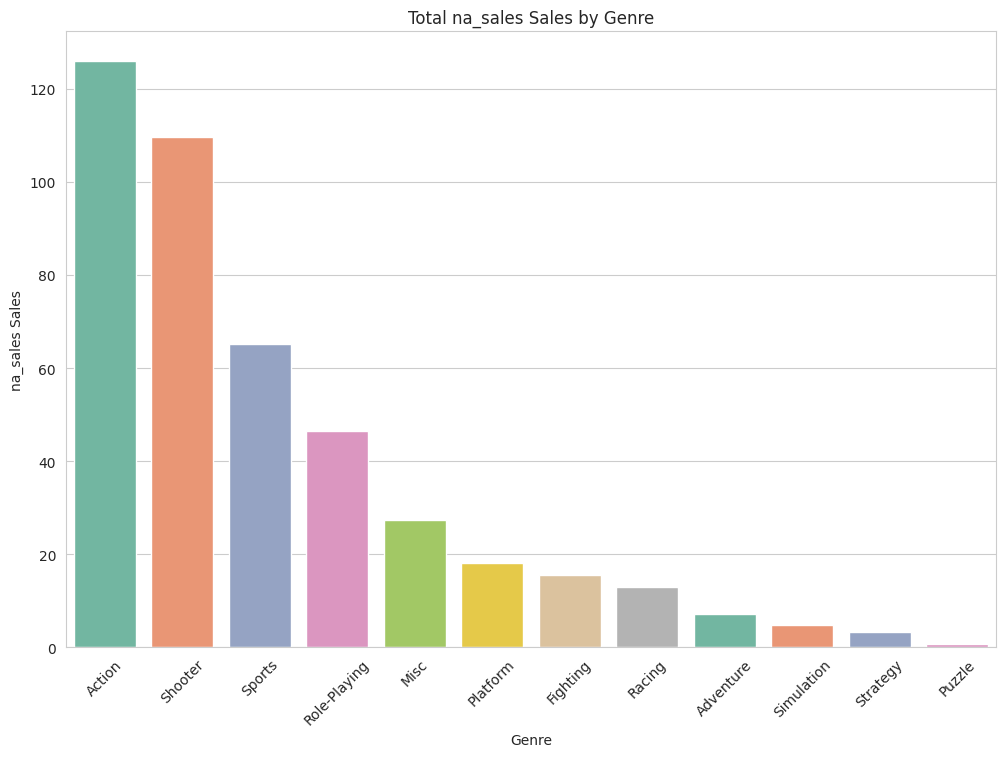

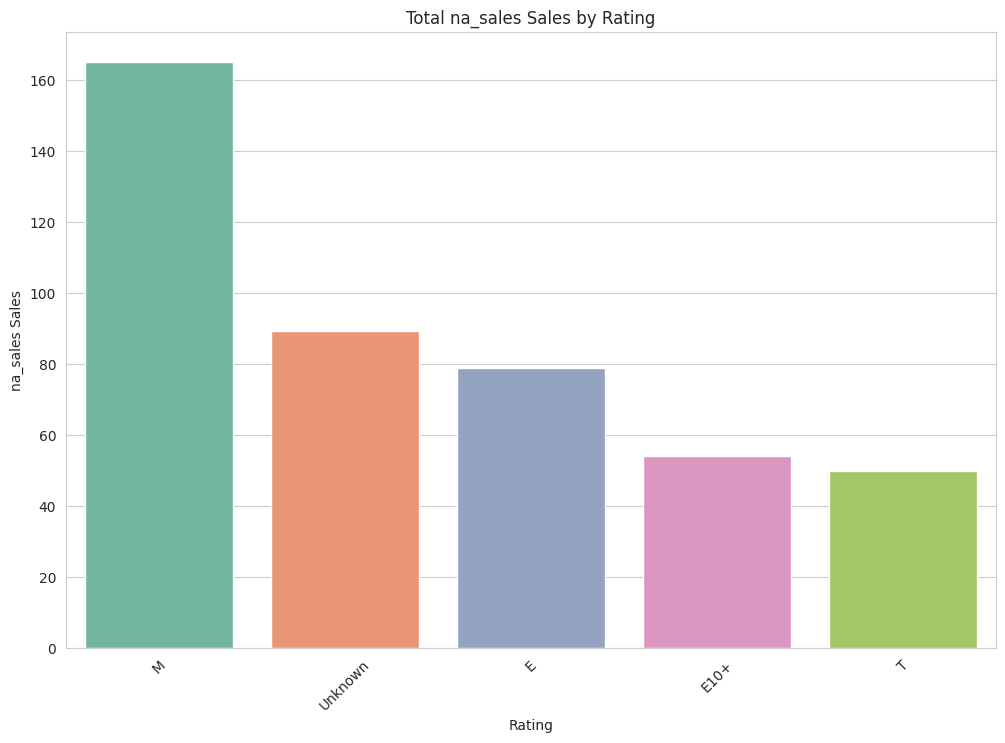

In [49]:
sales(na, filtered_df, 'na_sales')

The X360 dominated the NA market, almost doubling its EU counterpart. However, the PS4 seemed to do better in Europe than the PS4. 
 Action and Shooter were the most popular games in North America. The most popular ESRB rating in NA is M.  

## EU Top Platforms

In [50]:
eu = filtered_df.groupby('platform')[['na_sales', 'jp_sales', 'eu_sales', 'total_sales']].sum().sort_values(by='eu_sales', ascending=False)

In [51]:
eu

,na_sales,jp_sales,eu_sales,total_sales
platform,,,,
PS4,108.74,15.96,141.09,314.14
PS3,63.50,23.35,67.81,181.43
XOne,93.12,0.34,51.59,159.32
X360,81.66,0.51,42.52,136.80
3DS,38.20,67.81,30.96,143.25
PC,11.11,0.00,25.36,39.43
WiiU,29.21,10.88,19.85,64.63
PSV,5.04,18.59,6.10,32.99
Wii,6.56,0.05,5.93,13.66


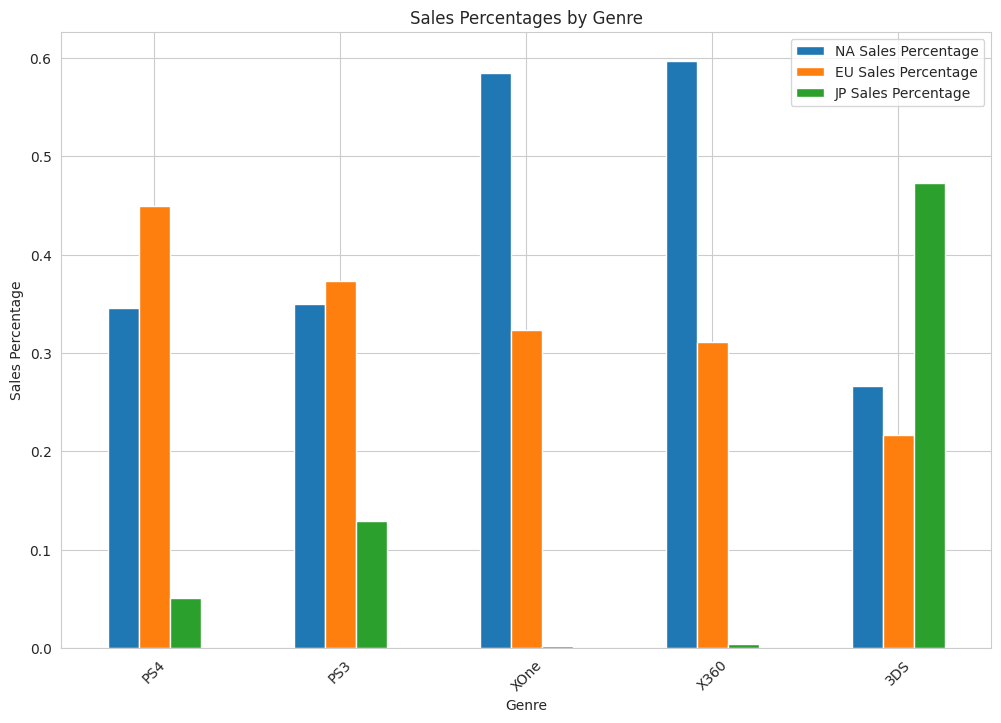

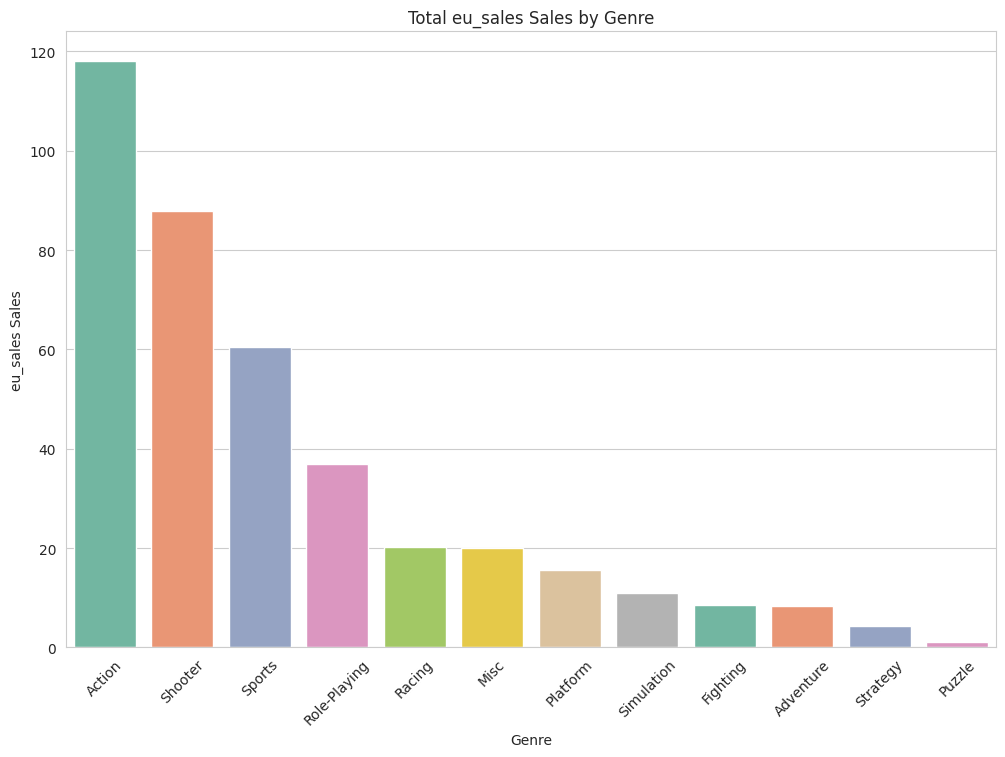

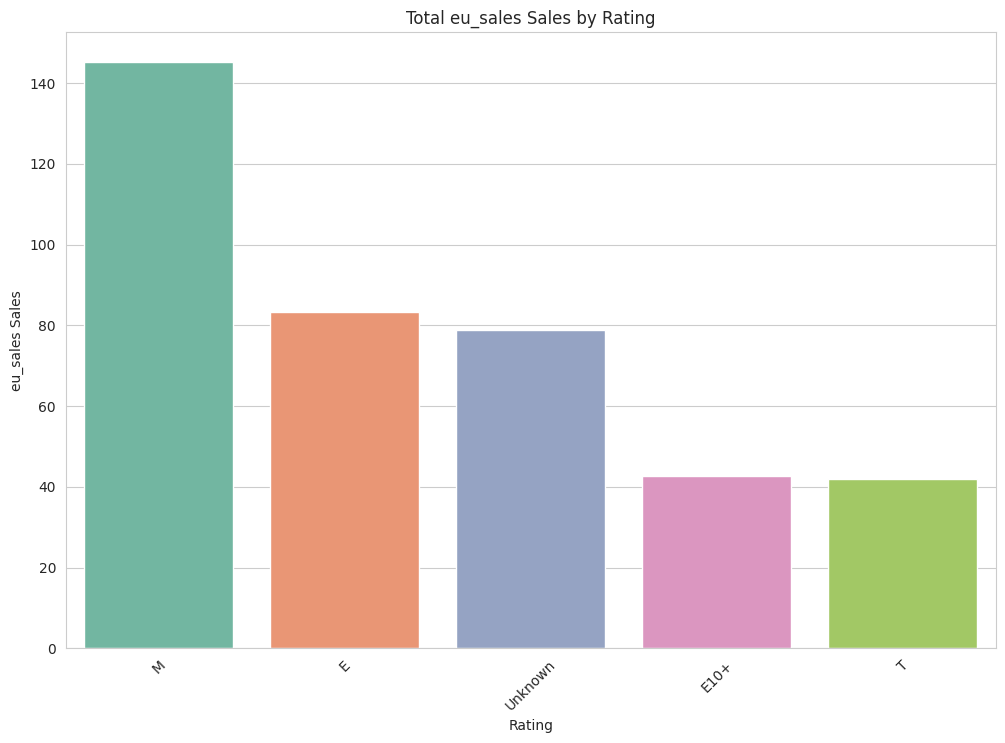

In [52]:
sales(eu, filtered_df, 'eu_sales')

I am unsurprised that PS4 is the most popular platform in Europe by the previous NA profile. Additionally, it makes sense
that the PS3 was the second most popular platform as Sony also made it. Still, the action and shooter genres are the most popular. 
Like NA, the most popular rating is M. 

## JP Top Platforms

In [53]:
jp = filtered_df.groupby('platform')[['na_sales', 'jp_sales', 'eu_sales', 'total_sales']].sum().sort_values(by='jp_sales', ascending=False)

In [54]:
jp

,na_sales,jp_sales,eu_sales,total_sales
platform,,,,
3DS,38.20,67.81,30.96,143.25
PS3,63.50,23.35,67.81,181.43
PSV,5.04,18.59,6.10,32.99
PS4,108.74,15.96,141.09,314.14
WiiU,29.21,10.88,19.85,64.63
PSP,0.00,3.29,0.17,3.50
X360,81.66,0.51,42.52,136.80
XOne,93.12,0.34,51.59,159.32
Wii,6.56,0.05,5.93,13.66


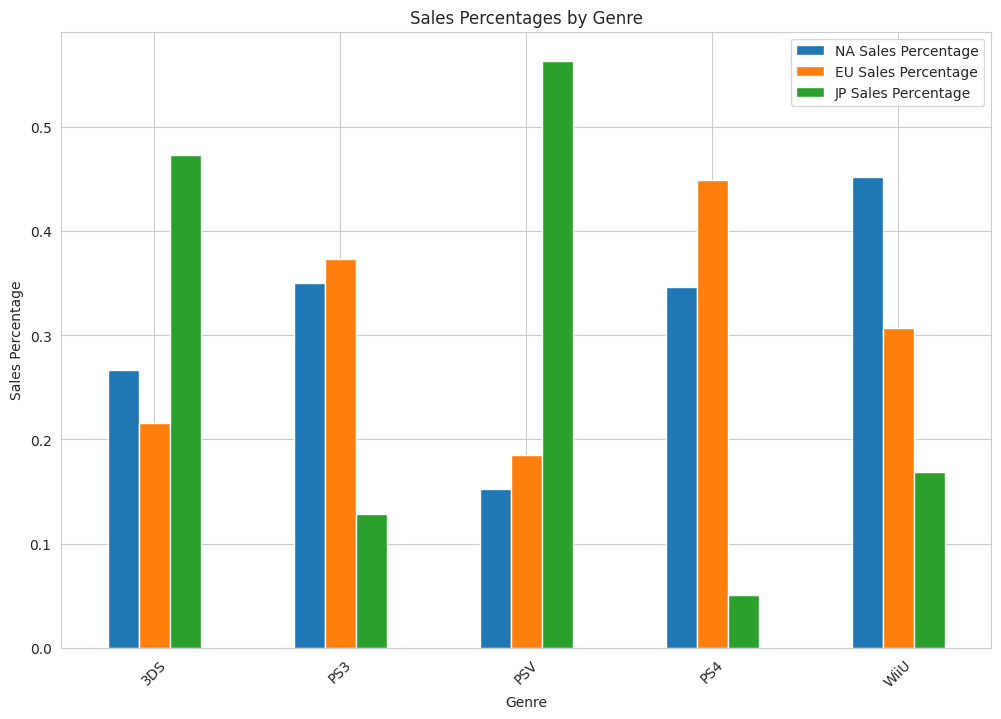

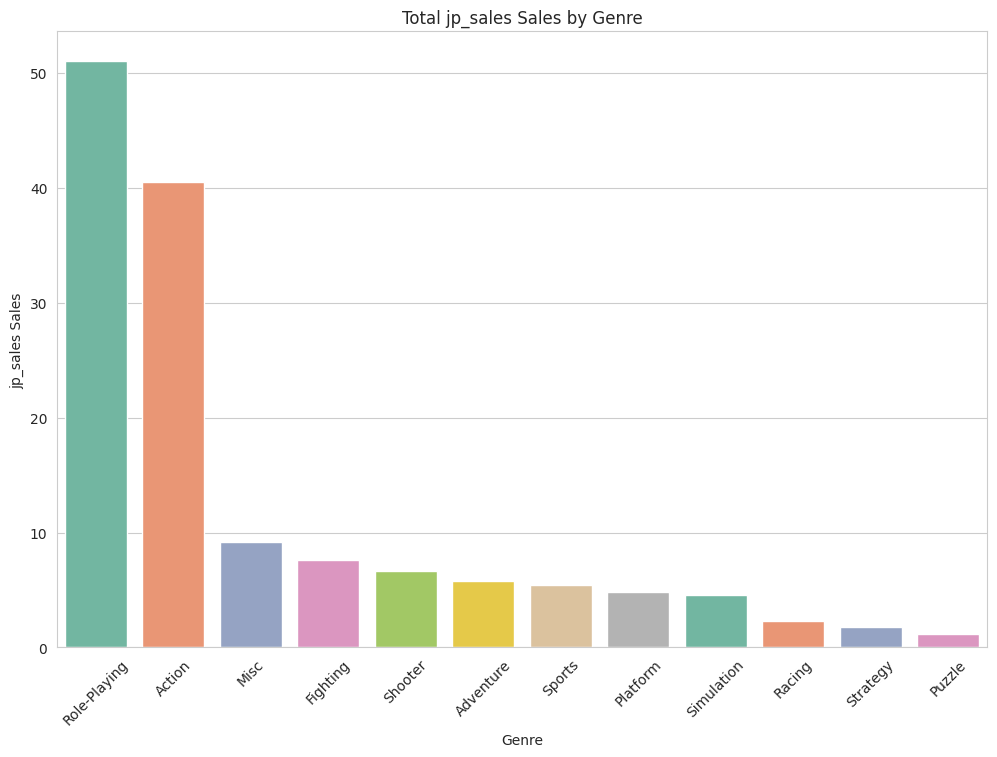

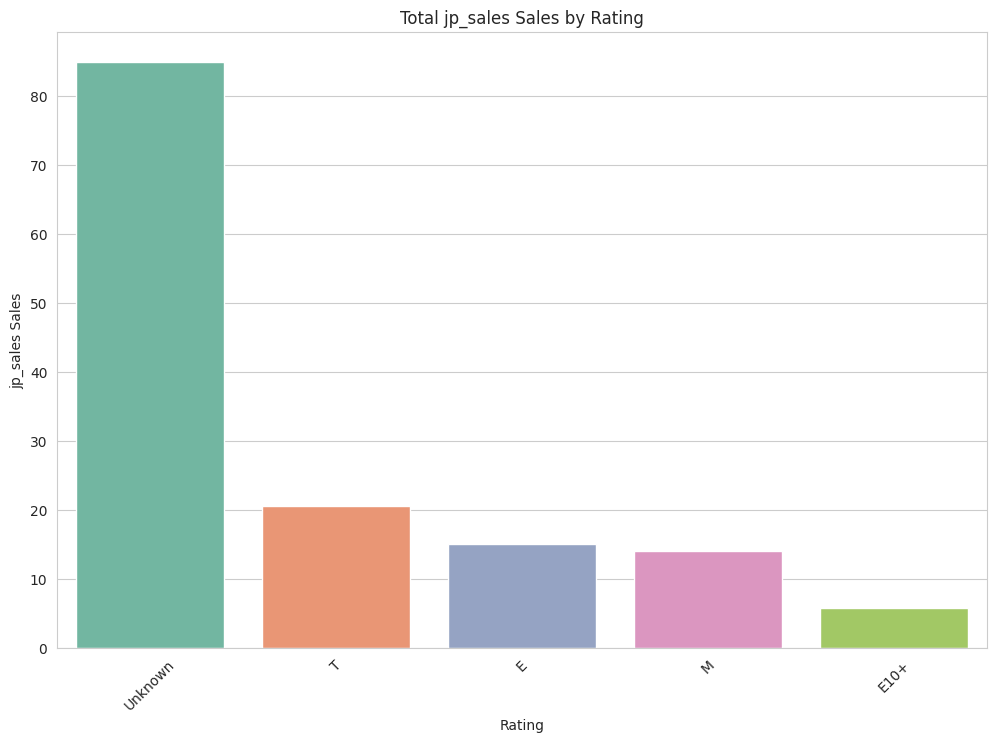

In [55]:
sales(jp, filtered_df, 'jp_sales')

Among the top five platforms sold in JP, the 3DS and PSV are the only two that outsold other regions. The top genre differed
in Japan, with role-playing at the top, followed by action. Unlike NA and EU, the most popular rating in JP is E followed by T. 

## Step 5. Test the following hypotheses

In [56]:
#Average user ratings of the Xbox One and PC platforms are the same. 
Xone = filtered_df[filtered_df['platform'] == 'XOne']
Pc = filtered_df[filtered_df['platform'] == 'PC']

alpha = .05#Standard significance level

#use Welch's t-test for unequal variances 
results = st.ttest_ind(Xone['user_score'], Pc['user_score'], equal_var = False, nan_policy='omit')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
#Null Hypothesis: Average user ratings of the Xbox One and PC platforms are the same. 
#Alternative Average user ratings of the Xbox One and PC platforms are different. 

p-value: 0.06826938615189478
We can't reject the null hypothesis


In [57]:
#Average user ratings for the Action and Sports genres are different.
Action = filtered_df[filtered_df['genre'] == 'Action']
Sports = filtered_df[filtered_df['genre'] == 'Sports']

alpha = .05#Standard significance level

results = st.ttest_ind(Action['user_score'], Sports['user_score'], equal_var = False, nan_policy='omit')

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    
#Null Hypothesis: Average user ratings for the Action and Sports genres are the same.
#Alternative Average user ratings for the Action and Sports genres are different. 

p-value: 1.4183656504408837e-20
We reject the null hypothesis


## Conclusion

The average user ratings for the Xbox One and PC platforms are the same, as are the average user ratings for the action and sports genres. 
As seen before, critic_score has more of an impact on sales. Advertising campaigns in the North American and European regions should focus
on the Xbox 360 and PS4. However, data from the heatmap suggests that Xbox360 sales are on the decline. To gain more sales within the 
In the JP region, emphasis should be placed on advertisements for E ESRB-rated games along with the role-playing genre. Meanwhile, M ESRB-rated action games are most profitable within the EU and NA regions.